In [4]:
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [5]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

Base = automap_base()

Base.prepare(engine, reflect=True)

In [7]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
session = Session(engine)

In [9]:
last_year = dt.date.today() - dt.timedelta(days=365)

In [11]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()

In [13]:
date_pre_pd = pd.DataFrame(results, columns=['date', 'precipitation'])
date_pre_pd.set_index(date_pre_pd['date'], inplace=True)

<IPython.core.display.Javascript object>


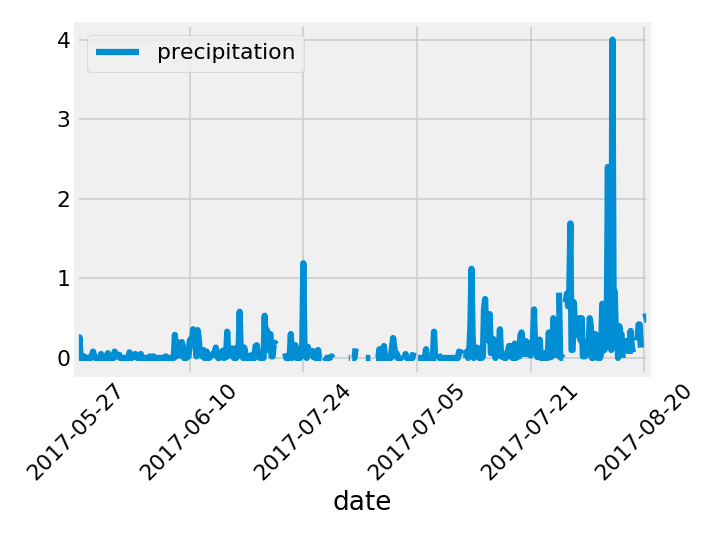

In [18]:
date_pre_pd.plot(x_compat = True)
plt.xticks(rotation = '45')
plt.tight_layout()
plt.show()

In [19]:
date_pre_pd.describe()

,precipitation
count,455.000000
mean,0.116176
std,0.286305
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.000000
